<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import os.path
import requests
from numpy import genfromtxt
!mkdir data #let us create data folder to hold our data

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [ ]:
dataset = 'mnist' # let us take iris dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"


dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 

if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)    
data_labels =  genfromtxt(groundtruth_url , delimiter='\t') #  i.e. 'iris' + + '-gt + '.txt' ==> iris-gt.txt 

data2d_ext = '-2d'
file_2d =  data_path + dataset + data2d_ext + file_ext # 'iris' + '-2d' + '.txt' ==> iris-2d.txt

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Dataset's Groundtruth


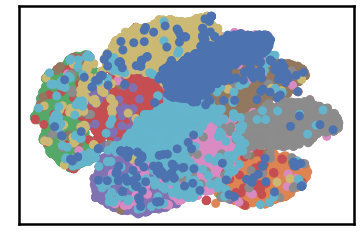



DenMune Analyzer
├── exec_time
│   ├── DenMune: 124.51
│   ├── NGT: 6.843
│   └── t_SNE: 1158.965
├── n_clusters
│   ├── actual: 10
│   └── detected: 9
├── n_points
│   ├── dim: 784
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 6903
│   ├── size: 70000
│   ├── strong: 37527
│   └── weak
│       ├── all: 32473
│       ├── failed to merge: 6903
│       └── succeeded to merge: 25570
└── validity
    ├── ACC: 66249
    ├── AMI: 0.895
    ├── ARI: 0.909
    ├── F1: 0.958
    ├── NMI: 0.895
    ├── completeness: 0.874
    └── homogeneity: 0.917



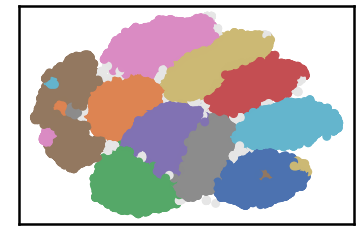

k= 60 F1 score is: 0.958


In [ ]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 60
dm = DenMune(data=data, file_2d=file_2d,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True)

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
    print ("Dataset\'s Groundtruth")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

labels_pred = dm.fit_predict()
validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)

dm.plot_clusters(labels=labels_pred, show_noise=show_noise)
        
validity_key = "F1"
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))